<a href="https://colab.research.google.com/github/krisnaaulia17/Pengembangan-Digital-Marketing/blob/master/Pengolahan_Data_Survey_Seminar_Online.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pengolahan Hasil Survey Series Seminar Online Statistika
Penulis: Krisna Aulia (IPB University)

---


Repository ini dibuat untuk memahami proses pengolahan data hasil survey peserta untuk mengetahui 'Materi Apa yang Diharapkan Peserta untuk Seminar Selanjutnya' setelah mengikuti Seminar Online Statistika yang diselenggarakan oleh Departemen Statistika IPB

Bahasa pemrograman yang akan digunakan pada repository ini akan menggunakan Python 3 dengan beberapa library. Pastikan Python 3 sudah terinstall pada mesin yang digunakan. Beberapa library khusus yang digunakan untuk pengolahan data ini adalah `re` (Regular Expression) `nltk` (Natural Language Toolkit) dan `wordcloud` (Membuat Wordcloud)

Data akan diolah dengan kaidah Natural Language Processing(NLP).


---


###**Catatan**
Sebelum mempelajari repository ini, alangkah baiknya untuk mempelajari terlebih dahulu terkait konsep dasar NLP dari berbagai sumber sehingga tidak bingung dengan istilah-istilah yang akan digunakan pada repository ini.

Repository ini menggunakan **Google Colab**, sehingga mungkin akan ada sedikit perbedaan terkait cara import dan export file yang digunakan, sehingga jika pembaca akan menggunakan Sublime atau Pycharm, dapat menyesuaikan saja.


---



## Flow Chart
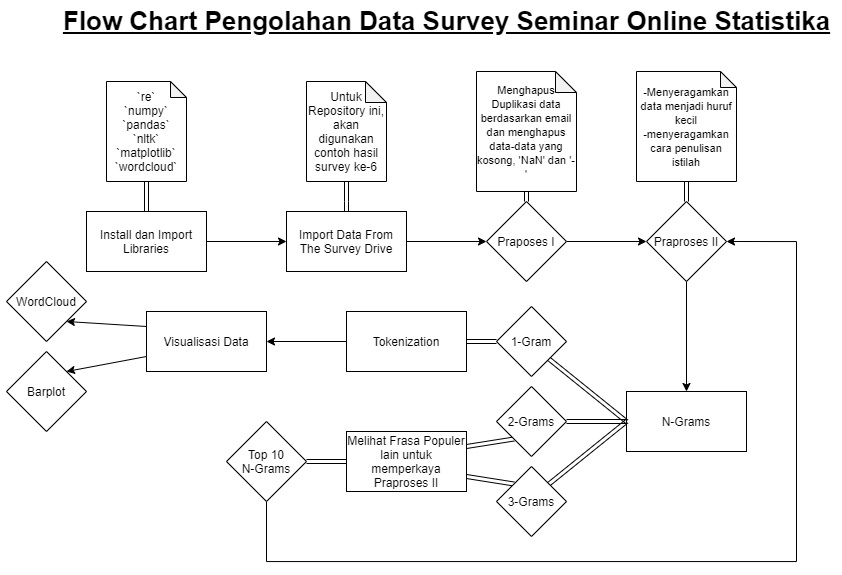

##Lets Get Started

1.   Menginstall dan Mengimport libraries yang dibutuhkan


In [1]:
#Mengimport beberapa package yang akan digunakan secara general
import re # re adalah package regular expression untuk mengolah data text yang akan digunakan
import numpy as np # np digunakan untuk memebnetuk multidimensional array pada python
import pandas as pd # pd digunakan untuk mengakses dokumen pada python
import nltk # nltk(natural language processin tool kit) merupakan package khusus yang digunakan untuk memproses data berbasis natural language
nltk.download('punkt') #mendownload himpunan punctuation yang tersedia dari nltk
from nltk.tokenize import word_tokenize #untuk melakukan tokenize pada kalimat
from matplotlib import pyplot as plt #membuat plot yang dibutuhkan
from collections import Counter #menghitung sesuatu
import wordcloud #membuat wordcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator #mengimport kebutuhan dalam membuat wordcloud
from PIL import Image #untuk mengimport gambar
from nltk.util import ngrams #untuk mensupport pembuatan ngrams


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Khusus untuk **Google Colab**, library ini dibutuhkan untuk menghubungkan **Google Colab** dengan directory **Google Drive**


In [ ]:
from google.colab import drive #package khusus untuk Google Colab ketika akan menggunakan file dari drive
drive.mount('/gdrive')
%cd /gdrive

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive
/gdrive


2. Melakukan import pada dataframe yang akan digunakan.

Pada tutorial ini, karena akan digunakan file dari Google Drive, maka kurang lebih akan seperti ini

In [2]:
#Raw Code nya seperti ini df = pd.read_excel(r' ')
#di dalam ' ' langsung dimasukan path dari dokumen yang akan digunakan
#contohnyadi bawah ini akan menggunakan data hasil survey seminar online statistika seri ke-6
df = pd.read_excel(r'/content/drive/My Drive/Colab Notebooks/6. Sertifikat Seminar Online_ Biostatistics (Responses).xlsx')
print(df) #cek file yang akan digunakan

                  Timestamp  ...               Document Merge Status - Sertifikat06
0   2020-07-15 09:53:01.023  ...  Document successfully created; Document succes...
1   2020-07-15 10:16:01.488  ...  Document successfully created; Document succes...
2   2020-07-15 10:21:39.781  ...  Document successfully created; Document succes...
3   2020-07-15 10:43:05.566  ...  Document successfully created; Document succes...
4   2020-07-15 10:44:01.730  ...  Document successfully created; Document succes...
..                      ...  ...                                                ...
882                     NaT  ...                                                NaN
883                     NaT  ...                                                NaN
884                     NaT  ...                                                NaN
885                     NaT  ...                                                NaN
886                     NaT  ...                                            

3. Praproses 1

Praproses 1 dilakukan agar data yang digunakan tidak redundant dan informasi yang dihasilkan bisa lebih valid.

In [3]:
#Memilih df yang akan digunakan
df = df.drop_duplicates(subset='Email', keep='first') #menghapus duplicated record berdasarkan email agar tidak redundant
df = df['Materi apa yang anda harapkan untuk Seminar Online selanjutnya?'] #mengakses kolom yang akan digunakan sesuai dengan judul kolom pada file
df = df.replace(np.nan, '', regex=True) #mengganti NaN menjadi sebuah list kosong
df = df.replace('-','',regex = True) #mengganti '-' menjadi sebuah list kosong
df = df[df != ''] #menghapus record yang kosong pada kolom 'Materi' karena tidak semua orang menuliskan materi yang diharapkan untuk seminar selanjutnya
print(df) #cek file yang sudah dipraproses

4      Vector Autoregressive dan Generalized Space Ti...
6                                       machine learning
9                                      Alatalat Analisis
10                                              Big data
12                                        Data scientist
                             ...                        
783           Apa saja yang mengenai statistika dan data
784    statistika praktis dalam kehidupan sehari2 unt...
785    karir keilmuan biostat dalam penerapan keilmua...
786                                    Statistik spasial
787                                   statistika terapan
Name: Materi apa yang anda harapkan untuk Seminar Online selanjutnya?, Length: 567, dtype: object


4. Praproses 2

Praproses 2 dilakukan untuk memudahkan NLP agar pengolahan data dapat dilakukan dengan lebih mudah.



> a. Lowercase Formatting

Melakukan lowercase formatting agar text yang digunakan lebih seragam dan menyamakan maksud yang dituliskan karena NLP Case Sensitive.





In [4]:
sentences= [] #membuat list kosong sebagai 'wadah' penyimpan reformatted sentences
for s in df :
  sentences.append(str(s).lower())
  
print(pd.DataFrame(sentences)) #cek hasil looping

                                                     0
0    vector autoregressive dan generalized space ti...
1                                     machine learning
2                                    alatalat analisis
3                                             big data
4                                       data scientist
..                                                 ...
562         apa saja yang mengenai statistika dan data
563  statistika praktis dalam kehidupan sehari2 unt...
564  karir keilmuan biostat dalam penerapan keilmua...
565                                  statistik spasial
566                                 statistika terapan

[567 rows x 1 columns]



> b. Melakukan penyamaan penulisan istilah agar data yang terjaring dapat lebih informatif

Perbedaan cara penulisan suatu materi akan membuat materi tersebut memiliki peluang kumulatif yang lebih kecil untuk terjaring sebagai materi yang populer. Contohnya adalah menyeragamkan penulisan 'data mining' menjadi 'datamining' agar 'data mining' dapat diproses sebagai satu kesatuan 'datamining', bukan terpisah menjadi 'data' dan 'mining'. Selain menyeragamkan cara penulisan istilah, kita juga dapat melakukan koreksi terhadap penulisan typo yang lumrah, misalnya 'arima' ditulis 'atima', dan juga dapat menghapuskan kata-kata yang menurut kita tidak memiliki arti dalam konteks yang sedang kita ingin ketahui.

In [5]:
#membuat list berisi frasa yang akan diubah menjadi istilah yang lebih seragam
kata_awal = ['big data', 'machine learning', 'covid 19',
             'covid19', 'small area estimation', 'atima', 
             'data mining', 'time series', 'analisis deret waktu',
             'data science', 'spasial', 'sains data',
             'analisis data', 'non parametrik', 'kategorik',
             'nonparametrik', 'modelling', 'pandemi', 
             'covid', 'analisa', 'linear regression',
             'model ', 'using'
             ]
#membuat list berisi istilah yang sudah diseragamkan menjadi satu kata
kata_ganti = ['bigdata', 'machinelearning', 'covid', 
              'covid', 'sae', 'arima', 
              'datamining', 'timeseries', 'timeseries', 
              'datascience', 'spatial', 'datascience',
              'analisisdata', 'nonparametric-categoic', 'nonparametric-categoric',
              'nonparametric-categoric', 'pemodelan','covid',
              'pandemicovid', 'analisis', 'linreg',
              'model', ''
              ]


def ganti(kata_awal, kata_ganti, sentences): #membuat fungsi untuk menyeragamkan istilah secara otomatis
  sents = [] #membuat list kosong untuk menampung hasil pengolahan kata
  for sent in sentences:
    for j in range(len(kata_ganti)):
      sent = sent.replace(kata_awal[j], kata_ganti[j]) #membuat fungsi dapat mengganti bagian kalimat yang sama seperti kata_awal[j] menjadi kata_ganti[j]
    sents.append(sent)
  return sents
sents=ganti(kata_awal, kata_ganti, sentences)

print(pd.DataFrame(sents)) #memeriksa hasil pengolahan


                                                     0
0    vector autoregressive dan generalized space ti...
1                                      machinelearning
2                                    alatalat analisis
3                                              bigdata
4                                       data scientist
..                                                 ...
562         apa saja yang mengenai statistika dan data
563  statistika praktis dalam kehidupan sehari2 unt...
564  karir keilmuan biostat dalam penerapan keilmua...
565                                  statistik spatial
566                                 statistika terapan

[567 rows x 1 columns]


5. Membuat N-gram(s)

N-grams berguna untuk melihat kata kata yang sering muncul dalam bentuk frasa lebih dari satu kata. Contohnya adalah 'big data'(2-grams) atau 'small area estimation'(3-grams). Mencari N-grams dapat disesuaikan dengan kebutuhan, untuk repository ini, akan dicari 1-gram, 2-grams, dan 3-grams untuk melihat kata yang sering muncul dalam bentuk 1 kata, 2 kata berdampingan, dan 3 kata berdampingan.



In [6]:
#Membuat fungsi untuk membuat n-gram
def get_ngrams(text, n ):
    n_grams = ngrams(word_tokenize(text), n)
    return [ ' '.join(grams) for grams in n_grams]

In [29]:
#membuat 1-gram
unigram = []
for s in sents:
  unigram.append(get_ngrams(s,1))
print(pd.DataFrame(unigram))

                  0               1        2   ...    31    32    33
0             vector  autoregressive      dan  ...  None  None  None
1    machinelearning            None     None  ...  None  None  None
2           alatalat        analisis     None  ...  None  None  None
3            bigdata            None     None  ...  None  None  None
4               data       scientist     None  ...  None  None  None
..               ...             ...      ...  ...   ...   ...   ...
562              apa            saja     yang  ...  None  None  None
563       statistika         praktis    dalam  ...  None  None  None
564            karir        keilmuan  biostat  ...  None  None  None
565        statistik         spatial     None  ...  None  None  None
566       statistika         terapan     None  ...  None  None  None

[567 rows x 34 columns]


In [28]:
#membuat 2-gram
bigram = []
for s in sents:
  bigram.append(get_ngrams(s,2))
print(pd.DataFrame(bigram))

                        0                   1   ...    31    32
0    vector autoregressive  autoregressive dan  ...  None  None
1                     None                None  ...  None  None
2        alatalat analisis                None  ...  None  None
3                     None                None  ...  None  None
4           data scientist                None  ...  None  None
..                     ...                 ...  ...   ...   ...
562               apa saja           saja yang  ...  None  None
563     statistika praktis       praktis dalam  ...  None  None
564         karir keilmuan    keilmuan biostat  ...  None  None
565      statistik spatial                None  ...  None  None
566     statistika terapan                None  ...  None  None

[567 rows x 33 columns]


In [9]:
#membuat 3-gram
trigram = []
for s in sents:
  trigram.append(get_ngrams(s,3))
print(pd.DataFrame(trigram))

                            0                               1   ...    30    31
0    vector autoregressive dan  autoregressive dan generalized  ...  None  None
1                         None                            None  ...  None  None
2                         None                            None  ...  None  None
3                         None                            None  ...  None  None
4                         None                            None  ...  None  None
..                         ...                             ...  ...   ...   ...
562              apa saja yang              saja yang mengenai  ...  None  None
563   statistika praktis dalam         praktis dalam kehidupan  ...  None  None
564     karir keilmuan biostat          keilmuan biostat dalam  ...  None  None
565                       None                            None  ...  None  None
566                       None                            None  ...  None  None

[567 rows x 32 columns]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: generator 'ngrams' raised StopIteration
  after removing the cwd from sys.path.


n-gram yang dibuat sampai n=3 dimaksudkan untuk mendapatkan insight baru terkait istilah yang sering digunakan dalam frasa 1-3 kata sehingga variabel *kata_awal* dan *kata_ganti* dapat terus diperkaya kapasitas koreksinya.

Top10 2-grams dan 3-grams dapat dijadikan acuan untuk disatukan menjadi frasa dalam bentuk 1 kata.

6. Tokenization

Dalam NLP, terdapat 2 aliran utama dalam pengolahan datanya, *Semantic Parsing* dan *Bag of Words*. Pada repository ini akan digunakan *Bag of Words* untuk memudahkan pengolahan data.

Dalam *Bag of Words* setiap kata dianggap sebagai objek sehingga ukuran kemenarikan objek pada dasarnya akan dilihat dari frekuensi kemunculan setiap objek, dalam kata lain, kata per kata. *Tokenization* adalah istilah untuk melakukan pemenggalan kata dalam sebuah kalimat agar setiap kata tersebut dianggap sebagai sebuah objek atau dalam hal ini akan kita sebut sebagai token.

Karena kita tahu bahwa dalam lingkup Statistika dan Sains Data, beberapa kata tidak terlalu bermakna jika berdiri sendiri, maka dari itu kita melakukan penyamaan istiah di awal dengan mengganti *kata_awal* menjadi *kata_ganti*, agar ketika dilakukan *tokenization*, frasa tersebut tidak kehilangan maknanya. Misalnya 'big data' akan kehilangan maknanya ketika di-*tokenize* menjadi 'big' dan 'data'. Maka dari itu dilakukan pengolahan supaya 'big data' diidentifikasi sebagai 'bigdata'.





> Stopwords

*Stopwords* adalah kata-kata yang tidak memiliki makna yang berarti. Misalnya dalam bahasa indonesia; dan, atau, iya, tidak, dll, atau dalam bahasa inggris; *the*, *and*, *yes*, *no*, *yet*, *either*, dll.

Sebelum melakukan *tokenization*, ada baiknya untuk mendefinisikan *stopwords* agar memudahkan untuk tidak mengikutertakan kata-kata yang termasuk dalam *stopwords* ke dalam tokens. Karena bahasa yang digunakan oleh responden dalam mengisi kuesioner adalah dalam bahasa indonesia dan bahasa inggris, maka kita akan menghapuskan *stopwords* dalam bahasa indonesia dan bahasa inggris.




In [10]:
!pip install sastrawi #menginstall library sastrawi menggunakan pip install
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
 
factory = StopWordRemoverFactory()
hapus = factory.get_stop_words()
stopwords = set(STOPWORDS)

for i in hapus:
  stopwords.add(i)
print(pd.DataFrame(stopwords))

     |████████████████████████████████| 215kB 2.8MB/s 
           0
0        why
1     dahulu
2        can
3      until
4       here
..       ...
308   seraya
309    their
310  weren't
311    while
312     akan

[313 rows x 1 columns]


In [11]:
#tokenization
grams = unigram #memilih ngram yang akan digunakan. Token sejatinya dibuat dalam satu kata(unigram)

tokens = [] #membuat wadah untuk menampung tokens

#looping untuk memastikan setiap element yang disimpan dalam tokens adalah unik dan bukan termasuk stopwords
for i in grams:
  for j in i:
    if j not in stopwords:
      tokens.append(j)

print(pd.DataFrame(tokens)) #memeriksa tokens yang terbentuk

                   0
0             vector
1     autoregressive
2        generalized
3              space
4               time
...              ...
1735          bidang
1736       statistik
1737         spatial
1738      statistika
1739         terapan

[1740 rows x 1 columns]


7. Visualisasi Data

Visualisasi data dimaksudkan untuk mempermudah ekplorasi data. Walaupun dalam bentuk tulisan dan tabel sudah informatif, namun visualisasi data akan memberikan *insight* dari sudut pandang lain dalam melihat data.



> a. WordCloud

Visualisasi data dalam bentuk WordCloud sangat cocok untuk data berbentuk *Bag of Words* dengan frekuensi setiap kata yang berbeda-beda. Semakin besar ukuran sebuah kata, maka menunjukkan semakin tinggi pula frekuensi kemunculan kata tersebut dalam data yang diolah.



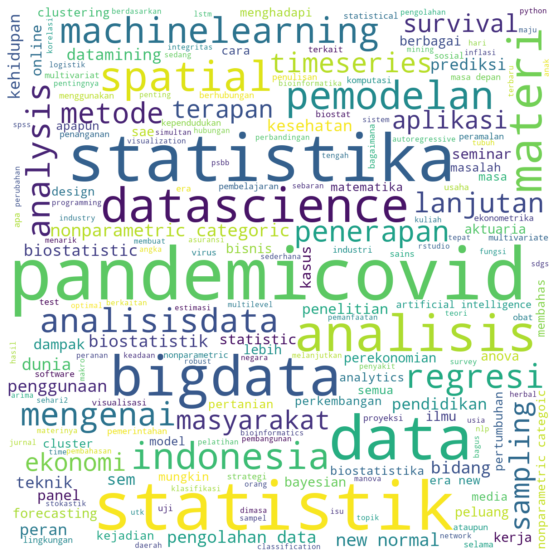

In [13]:
#Wordcloud
gambar = ' '.join(tokens)   
wordcloud = WordCloud(width=1600, height=800).generate(gambar)



wc = WordCloud(background_color = 'white',
               stopwords = stopwords,
               contour_width = 3,
               contour_color = 'black',
               width=1200, height=1200
              #mask = (directory gambar yang akan menjadi 'wadah' wordcloud. secara default akan terbentuk menjadi persegi)
               )
wc.generate(str(gambar))
plt.figure( figsize=(10,10) )
plt.imshow(wc)

#Plotting
plt.imshow(wc, interpolation = 'bilinear')
plt.axis('off')
plt.show()



> b. Grafik Barplot

Barplot juga sangat berguna untuk membandingkan frekuensi beberapa objek dengan total frekuensi yang tidak terlalu berbeda jauh. Berdasarkan hasil `wordcloud`, kita dapat melihat kata-kata yang tidak termasuk *stopwords* namun pada konteks yang sedang kita bahas, kata-kata dengan ukuran yang cukup besar itu tidak terlalu berarti kehadirannya.



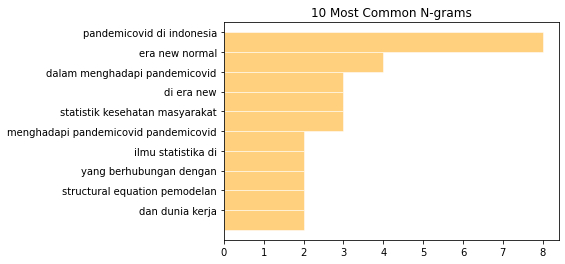

<Figure size 1440x720 with 0 Axes>

In [30]:
#Pembuatan Barplot 1-Gram

#Membaut looping untuk melakukan cleaning tambahan ketika ada kata-kata yang 
#tidak diinginkan untuk masuk dalam analisis namun muncul pada wordcloud

hapus2 = [',', 'materi','data', 'pandemicovid'] #list ini dapat disesuaikan dengan kebutuhan pengguna

for i in tokens:
  if i in hapus2:
    tokens.remove(i)

labels, values = zip(*Counter(tokens).most_common(10))

indexes = np.arange(len(labels))
ind = indexes[::-1]
width = 1

plt.barh(ind, values, width, align = 'center', alpha = 0.5, color ='orange', edgecolor = 'white' )
plt.yticks(ind + width * 0.5, labels)
plt.title('10 Most Common N-grams')
plt.figure( figsize=(20,10) )
plt.show()

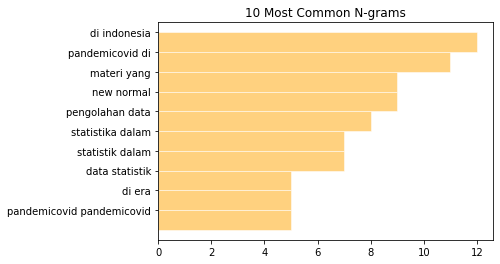

<Figure size 1440x720 with 0 Axes>

In [26]:
#Pembuatan Barplot 2-Grams

#Membuat looping untuk melakukan cleaning tambahan ketika ada kata-kata yang 
#tidak diinginkan untuk masuk dalam analisis namun muncul pada wordcloud

tokens=[]

for i in bigram:
  for j in i:
    tokens.append(j)

labels, values = zip(*Counter(tokens).most_common(10))

indexes = np.arange(len(labels))
ind = indexes[::-1]
width = 1

plt.barh(ind, values, width, align = 'center', alpha = 0.5, color ='orange', edgecolor = 'white' )
plt.yticks(ind + width * 0.5, labels)
plt.title('10 Most Common N-grams')
plt.figure( figsize=(20,10) )
plt.show()

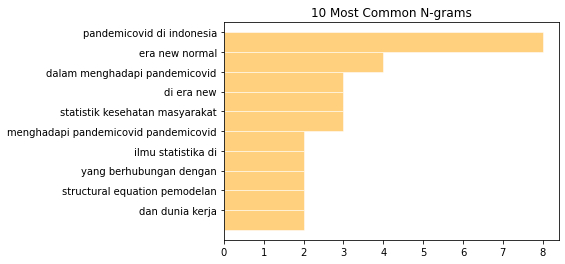

<Figure size 1440x720 with 0 Axes>

In [27]:
#Pembuatan Barplot 3-Grams

#Membuat looping untuk melakukan cleaning tambahan ketika ada kata-kata yang 
#tidak diinginkan untuk masuk dalam analisis namun muncul pada wordcloud

tokens=[]

for i in trigram:
  for j in i:
    tokens.append(j)

labels, values = zip(*Counter(tokens).most_common(10))

indexes = np.arange(len(labels))
ind = indexes[::-1]
width = 1

plt.barh(ind, values, width, align = 'center', alpha = 0.5, color ='orange', edgecolor = 'white' )
plt.yticks(ind + width * 0.5, labels)
plt.title('10 Most Common N-grams')
plt.figure( figsize=(20,10) )
plt.show()